In [1]:
## Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2) ## Generating synthetic dataset with 3 centers or clusters for K Means Clustering

In [3]:
X  ## Features data points

array([[ 4.37285199,  7.20920807],
       [-9.24145919, -7.80466847],
       [ 3.70078497,  8.31131527],
       ...,
       [ 2.79855879,  9.03923088],
       [ 3.88596637,  7.60586711],
       [ 6.0594978 ,  5.52135865]])

In [4]:
y ## Target labels for each data point

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1,
       1, 0, 2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0,
       0, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 2,
       2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 1,
       2, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2,
       2, 2, 1, 0, 0, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 1,

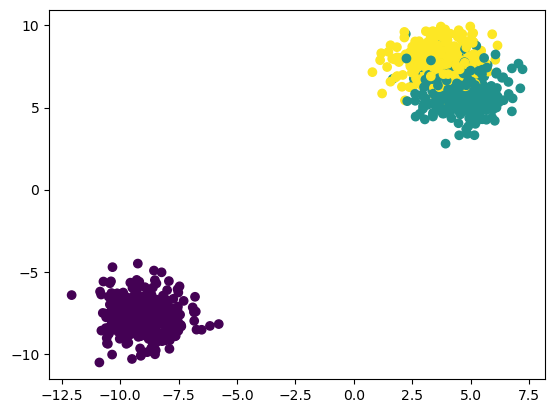

In [5]:
plt.scatter(X[:,0],X[:,1],c=y) ## Visualizing the generated data points with their respective cluster labels
plt.show()

In [6]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [9]:
X_train_scaled=scaler.fit_transform(X_train) ## Fitting and transforming the training data
X_test_scaled=scaler.transform(X_test) ## Transforming the test data

In [10]:
from sklearn.cluster import KMeans ## Importing KMeans from sklearn

In [11]:
import warnings
warnings.filterwarnings("ignore") ## To ignore any warnings

## Elbow method To select K Value
wcss=[] ## within cluster sum of squares
for k in range(1,11): ## Trying K values from 1 to 10
    kmeans=KMeans(n_clusters=k,init="k-means++") ## Initializing KMeans with k clusters and k-means++ initialization technique
    kmeans.fit(X_train_scaled) ## Fitting the model on scaled training data
    wcss.append(kmeans.inertia_) ## Appending the inertia (WCSS) value to the list

In [12]:
wcss ## Displaying the WCSS values for different K values

[1339.9999999999995,
 38.663222730927956,
 25.065735732238245,
 21.54132797681876,
 17.545233552398603,
 15.753228210455571,
 13.274848255940785,
 11.69277855438704,
 10.952478802803322,
 10.315843720883535]

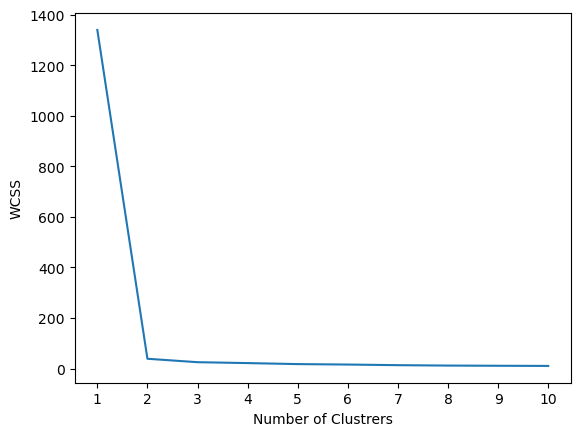

In [13]:
## plot elbow curve
plt.plot(range(1,11),wcss) ## Plotting WCSS values against number of clusters
plt.xticks(range(1,11)) ## Setting x-ticks for better readability
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++") ## Initializing KMeans with optimal k value of 3 clusters

In [15]:
kmeans.fit_predict(X_train_scaled) ## Fitting the model and predicting the cluster labels for training data

array([2, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0,
       0, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2,
       2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0,
       1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1,
       1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 1,
       0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2,
       1, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1,
       1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 0, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled) ## Predicting the cluster labels for test data

In [17]:
y_pred 

array([2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 2, 2,
       0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1,
       2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 0, 0, 0,
       1, 1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 1, 0,

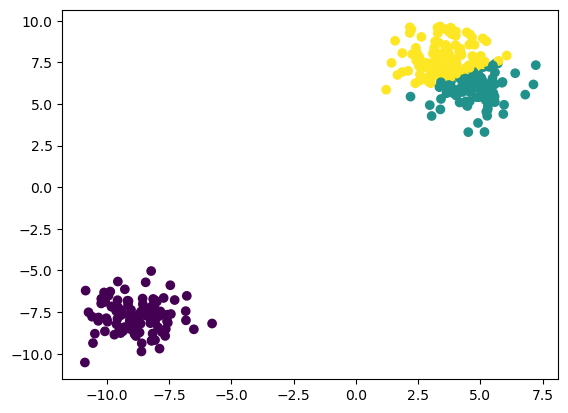

In [18]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred) ## Visualizing the test data points with their predicted cluster labels
plt.show()

In [19]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator ## Importing KneeLocator from kneed package

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing") ## Initializing KneeLocator with WCSS values to find the elbow point

In [23]:
kl.elbow ## Displaying the elbow point (optimal k value)

np.int64(2)

In [24]:
## silhoutte score 
from sklearn.metrics import silhouette_score ## Importing silhouette_score from sklearn metrics

In [25]:
silhouette_coefficients=[] ## List to store silhouette scores for different k values
for k in range(2,11): ## Trying k values from 2 to 10
    kmeans=KMeans(n_clusters=k,init="k-means++") ## Initializing KMeans with k clusters and k-means++ initialization technique
    kmeans.fit(X_train_scaled) ## Fitting the model on scaled training data
    score=silhouette_score(X_train_scaled,kmeans.labels_) ## Calculating silhouette score for the current k value
    silhouette_coefficients.append(score) ## Appending the score to the list

In [26]:
silhouette_coefficients ## Displaying silhouette scores for different k values

[np.float64(0.8985903210145146),
 np.float64(0.5779808395309717),
 np.float64(0.5237707653297229),
 np.float64(0.3594756345793174),
 np.float64(0.3401913698810628),
 np.float64(0.3333431158623823),
 np.float64(0.32342519288875754),
 np.float64(0.32261560310992915),
 np.float64(0.3107201054689942)]

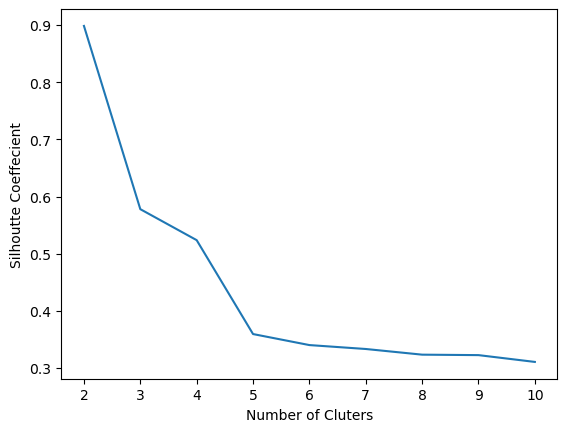

In [30]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients) ## Plotting silhouette scores against number of clusters
plt.xticks(range(2,11)) ## Setting x-ticks for better readability
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()